In [1]:
import os
import cudaq

os.environ["OQC_URL"]="https://cloud.oqc.app"
#os.environ["OQC_DEVICE"]="qpu:jp:3:673b1ad43c" # Tokyo
os.environ["OQC_DEVICE"]="qpu:uk:2:d865b5a184" # Lucy
os.environ["OQC_AUTH_TOKEN"]="<enter your access token>"
#cudaq.set_target("oqc",machine="toshiko")
cudaq.set_target("oqc",machine="lucy")

In [2]:
# Initialize a kernel/ ansatz and variational parameters.
@cudaq.kernel
def kernel(angles: list[float]):
    # Allocate a qubit that is initialized to the |0> state.
    qubit = cudaq.qubit()
    # Define gates and the qubits they act upon.
    rx(angles[0], qubit)
    ry(angles[1], qubit)


# Our Hamiltonian will be the Z expectation value of our qubit.
hamiltonian = cudaq.spin.z(0)

# Initial gate parameters which intialize the qubit in the zero state
initial_parameters = [0, 0]

cost_values = []


def cost(parameters):
    """Returns the expectation value as our cost."""
    expectation_value = cudaq.observe(kernel, hamiltonian,
                                      parameters).expectation()
    cost_values.append(expectation_value)
    return expectation_value

1.0


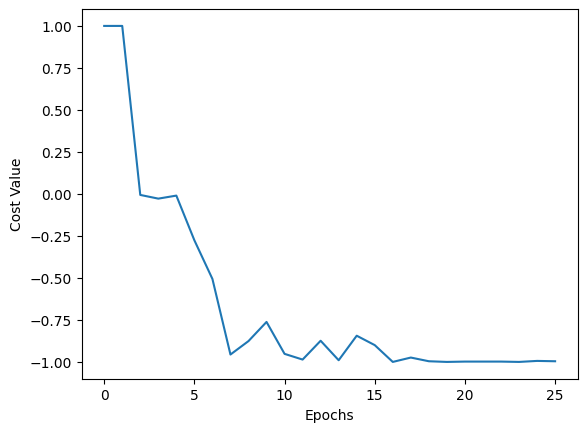

In [3]:
# We see that the initial value of our cost function is one, demonstrating that our qubit is in the zero state
initial_cost_value = cost(initial_parameters)
print(initial_cost_value)

# Define a CUDA-Q optimizer.
optimizer = cudaq.optimizers.COBYLA()
optimizer.initial_parameters = initial_parameters
optimizer.max_iterations = 25

result = optimizer.optimize(dimensions=2, function=cost)

# Plotting how the value of the cost function decreases during the minimization procedure.
import matplotlib.pyplot as plt

x_values = list(range(len(cost_values)))
y_values = cost_values

plt.plot(x_values, y_values)

plt.xlabel("Epochs")
plt.ylabel("Cost Value")
plt.savefig("costmin.png")